In [1]:
library(tidyverse)
options(repr.plot.width = 7)
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
all_species = c("hsapiens", "mmulatta",'cjacchus','ptroglodytes','ggorilla' )

In [3]:
species_1 = 'ptroglodytes'
species_2 = 'hsapiens'

In [4]:
data <- read_csv(paste0("homology_mapped_o2o_", species_1, "_", species_2, "_1TPM.csv"))

New names:
• `` -> `...1`
Rows: 12990 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): ensembl_gene_id, hsapiens_homolog_ensembl_gene, hsapiens_homolog_o...
dbl (33): ...1, Unnamed: 0_ptroglodytes, mean_exp_ptroglodytes, min_exp_ptro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
levels(factor(data$hsapiens_homolog_orthology_type))

[1] "ortholog_one2one"

In [6]:
data %>% group_by(get(paste0("spec_category_", species_1))) %>% count() %>% 
ungroup() %>% 
mutate(pct = n / sum(n)) %>% 
rename("spec_category_sp1" = "get(paste0(\"spec_category_\", species_1))")

spec_category_sp1,n,pct
<chr>,<int>,<dbl>
cell type enhanced,1916,0.14749808
cell type enriched,1237,0.09522710
group enhanced,422,0.03248653
group enriched,943,0.07259430
low cell type specificity,7159,0.55111624
lowly expressed,1313,0.10107775


In [33]:
order = c( 'lowly expressed', 'low cell type specificity', 'group enhanced', 'group enriched', 'cell type enhanced', 'cell type enriched')

In [67]:
color_spec = brewer_pal(palette = 'Paired')(12)[c(1, 3, 5, 7, 9, 11)]

In [81]:
fig_sp1 = data %>% group_by(get(paste0("spec_category_", species_1))) %>% count() %>% 
ungroup() %>% 
mutate(pct = n / sum(n)) %>% 
rename("spec_category_sp1" = "get(paste0(\"spec_category_\", species_1))") %>% 
ggplot(aes(x = factor(1), y = pct, fill = factor(spec_category_sp1, levels = rev(order)))) + 
geom_bar(stat = 'identity', position = 'stack', color = 'black', size = 0.1) +
coord_polar(theta = 'y') +
geom_text(aes(x = 1.7, label = scales::percent(pct, accuracy = .1), alpha = NULL), position = position_stack(vjust = .5), show.legend=FALSE) + 
scale_fill_viridis_d(name = 'Specificity', direction = -1) + 
common_0x +
theme(axis.line.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.x = element_blank(),
     axis.line.y = element_blank(),
     axis.title.x = element_blank(),
     axis.title.y = element_blank()) +
labs(title = paste0("Classes in ", species_1, " of O2O orthologs with ", species_2))

In [82]:
options(repr.plot.height = 4, repr.plot.width = 5)

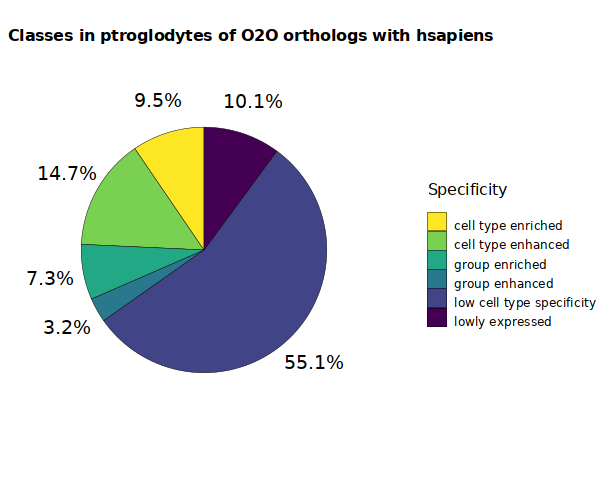

In [83]:
fig_sp1

In [84]:
ggsave(plot = fig_sp1, filename = paste0("pie_classes_o2o/", species_1, "_O2O_", species_2, "_", species_1, "_classes_1TPM.pdf"), height = 4, width = 5)

Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”


In [110]:
all_pairs <- data.frame(
  species_1 = c('cjacchus', 'cjacchus', 'cjacchus', 'cjacchus', 'mmulatta', 'mmulatta', 'mmulatta', 'ggorilla', 'ggorilla', 'ptroglodytes', 'ptroglodytes'),
  species_2 = c('mmulatta', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ptroglodytes', 'hsapiens', 'hsapiens', 'hsapiens')
)

# Iterate over rows and assign values to species_1 and species_2
for (i in 1:nrow(all_pairs)) {
    species_1 <- all_pairs[i, 'species_1']
    species_2 <- all_pairs[i, 'species_2']

    data <- read_csv(paste0("homology_mapped_o2o_", species_1, "_", species_2, "_1TPM.csv"))

    fig_sp1 = data %>% group_by(get(paste0("spec_category_", species_1))) %>% count() %>% 
ungroup() %>% 
mutate(pct = n / sum(n)) %>% 
rename("spec_category_sp1" = "get(paste0(\"spec_category_\", species_1))") %>% 
ggplot(aes(x = factor(1), y = pct, fill = factor(spec_category_sp1, levels = rev(order)))) + 
geom_bar(stat = 'identity', position = 'stack', color = 'black', size = 0.1) +
coord_polar(theta = 'y') +
geom_text(aes(x = 1.7, label = scales::percent(pct, accuracy = .1), alpha = NULL), position = position_stack(vjust = .5), show.legend=FALSE) + 
scale_fill_viridis_d(name = 'Specificity', direction = -1) + 
common_0x +
theme(axis.line.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.x = element_blank(),
     axis.line.y = element_blank(),
     axis.title.x = element_blank(),
     axis.title.y = element_blank()) +
labs(title = paste0("Classes in ", species_1, " of O2O orthologs with ", species_2))


    ggsave(plot = fig_sp1, filename = paste0("pie_classes_o2o/", species_1, "_O2O_", species_2, "_", species_1, "_classes_1TPM.pdf"), height = 4, width = 5)

        ggsave(plot = fig_sp1, filename = paste0("pie_classes_o2o/", species_1, "_O2O_", species_2, "_", species_1, "_classes_1TPM.png"), height = 4, width = 5, dpi = 300)



        fig_sp2 = data %>% group_by(get(paste0("spec_category_", species_2))) %>% count() %>% 
ungroup() %>% 
mutate(pct = n / sum(n)) %>% 
rename("spec_category_sp2" = "get(paste0(\"spec_category_\", species_2))") %>% 
ggplot(aes(x = factor(1), y = pct, fill = factor(spec_category_sp2, levels = rev(order)))) + 
geom_bar(stat = 'identity', position = 'stack', color = 'black', size = 0.1) +
coord_polar(theta = 'y') +
geom_text(aes(x = 1.7, label = scales::percent(pct, accuracy = .1), alpha = NULL), position = position_stack(vjust = .5), show.legend=FALSE) + 
scale_fill_viridis_d(name = 'Specificity', direction = -1) + 
common_0x +
theme(axis.line.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.x = element_blank(),
     axis.line.y = element_blank(),
     axis.title.x = element_blank(),
     axis.title.y = element_blank()) +
labs(title = paste0("Classes in ", species_2, " of O2O orthologs with ", species_1))


    ggsave(plot = fig_sp2, filename = paste0("pie_classes_o2o/", species_1, "_O2O_", species_2, "_", species_2, "_classes_1TPM.pdf"), height = 4, width = 5)

    ggsave(plot = fig_sp2, filename = paste0("pie_classes_o2o/", species_1, "_O2O_", species_2, "_", species_2, "_classes_1TPM.png"), height = 4, width = 5, dpi = 300)


    }


New names:
• `` -> `...1`
Rows: 12205 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): ensembl_gene_id, mmulatta_homolog_ensembl_gene, mmulatta_homolog_o...
dbl (33): ...1, Unnamed: 0_cjacchus, mean_exp_cjacchus, min_exp_cjacchus, ma...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
New names:
• `` -> `...1`
Rows: 11470 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): ensembl_gene_id, ggorilla_homolog_ensembl_gene, ggorilla_homolog_o...
dbl (33): ...1, Unnamed: 0_cjacchus, mean_exp_cjacchus, min_exp_cjacchus, ma...

ℹ Use `spec()` to retrieve the full column specification f

In [86]:
order_dist = c('expressed in over 90%','expressed in over 30%','expressed in less than 30%','expressed in single','lowly expressed')

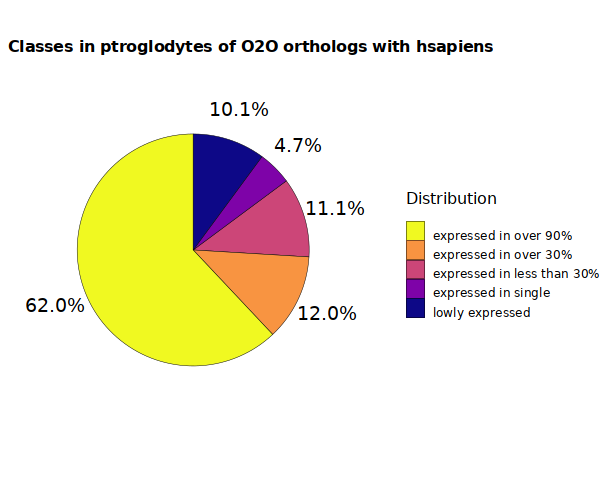

In [90]:
data %>% group_by(get(paste0("dist_category_", species_1))) %>% count() %>% 
ungroup() %>% 
mutate(pct = n / sum(n)) %>% 
rename("dist_category_sp1" = "get(paste0(\"dist_category_\", species_1))") %>% 
ggplot(aes(x = factor(1), y = pct, fill = factor(dist_category_sp1, levels = order_dist))) + 
geom_bar(stat = 'identity', position = 'stack', color = 'black', size = 0.1) +
coord_polar(theta = 'y') +
scale_fill_viridis_d(option = 'plasma', name = 'Distribution', direction = -1) + 
geom_text(aes(x = 1.7, label = scales::percent(pct, accuracy = .1), alpha = NULL), position = position_stack(vjust = .5), show.legend=FALSE) + 
common_0x +
theme(axis.line.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.x = element_blank(),
     axis.line.y = element_blank(),
     axis.title.x = element_blank(),
     axis.title.y = element_blank()) +
labs(title = paste0("Classes in ", species_1, " of O2O orthologs with ", species_2))

In [113]:
all_pairs <- data.frame(
  species_1 = c('cjacchus', 'cjacchus', 'cjacchus', 'cjacchus', 'mmulatta', 'mmulatta', 'mmulatta', 'ggorilla', 'ggorilla', 'ptroglodytes', 'ptroglodytes'),
  species_2 = c('mmulatta', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ptroglodytes', 'hsapiens', 'hsapiens', 'hsapiens')
)

# Iterate over rows and assign values to species_1 and species_2
for (i in 1:nrow(all_pairs)) {
    species_1 <- all_pairs[i, 'species_1']
    species_2 <- all_pairs[i, 'species_2']

    data <- read_csv(paste0("homology_mapped_o2o_", species_1, "_", species_2, "_1TPM.csv"))

    fig_sp1 = data %>% group_by(get(paste0("dist_category_", species_1))) %>% count() %>% 
ungroup() %>% 
mutate(pct = n / sum(n)) %>% 
rename("dist_category_sp1" = "get(paste0(\"dist_category_\", species_1))") %>% 
ggplot(aes(x = factor(1), y = pct, fill = factor(dist_category_sp1, levels = order_dist))) + 
geom_bar(stat = 'identity', position = 'stack', color = 'black', size = 0.1) +
coord_polar(theta = 'y') +
scale_fill_viridis_d(option = 'plasma', name = 'Distribution', direction = -1) + 
geom_text(aes(x = 1.7, label = scales::percent(pct, accuracy = .1), alpha = NULL), position = position_stack(vjust = .5), show.legend=FALSE) + 
common_0x +
theme(axis.line.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.x = element_blank(),
     axis.line.y = element_blank(),
     axis.title.x = element_blank(),
     axis.title.y = element_blank()) +
labs(title = paste0("Classes in ", species_1, " of O2O orthologs with ", species_2))


    ggsave(plot = fig_sp1, filename = paste0("pie_classes_o2o/", species_1, "_O2O_", species_2, "_", species_1, "_classes_dist_1TPM.pdf"), height = 4, width = 5)

        ggsave(plot = fig_sp1, filename = paste0("pie_classes_o2o/", species_1, "_O2O_", species_2, "_", species_1, "_classes_dist_1TPM.png"), height = 4, width = 5, dpi = 300)



        fig_sp2 = data %>% group_by(get(paste0("dist_category_", species_2))) %>% count() %>% 
ungroup() %>% 
mutate(pct = n / sum(n)) %>% 
rename("dist_category_sp2" = "get(paste0(\"dist_category_\", species_2))") %>% 
ggplot(aes(x = factor(1), y = pct, fill = factor(dist_category_sp2, levels = order_dist))) + 
geom_bar(stat = 'identity', position = 'stack', color = 'black', size = 0.1) +
coord_polar(theta = 'y') +
scale_fill_viridis_d(option = 'plasma', name = 'Distribution', direction = -1) + 
geom_text(aes(x = 1.7, label = scales::percent(pct, accuracy = .1), alpha = NULL), position = position_stack(vjust = .5), show.legend=FALSE) + 
common_0x +
theme(axis.line.x = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.x = element_blank(),
     axis.line.y = element_blank(),
     axis.title.x = element_blank(),
     axis.title.y = element_blank()) +
labs(title = paste0("Classes in ", species_2, " of O2O orthologs with ", species_1))


    ggsave(plot = fig_sp2, filename = paste0("pie_classes_o2o/", species_1, "_O2O_", species_2, "_", species_2, "_classes_dist_1TPM.pdf"), height = 4, width = 5)

    
        ggsave(plot = fig_sp2, filename = paste0("pie_classes_o2o/", species_1, "_O2O_", species_2, "_", species_2, "_classes_dist_1TPM.png"), height = 4, width = 5, dpi = 300)


    }


New names:
• `` -> `...1`
Rows: 12205 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): ensembl_gene_id, mmulatta_homolog_ensembl_gene, mmulatta_homolog_o...
dbl (33): ...1, Unnamed: 0_cjacchus, mean_exp_cjacchus, min_exp_cjacchus, ma...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
New names:
• `` -> `...1`
Rows: 11470 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): ensembl_gene_id, ggorilla_homolog_ensembl_gene, ggorilla_homolog_o...
dbl (33): ...1, Unnamed: 0_cjacchus, mean_exp_cjacchus, min_exp_cjacchus, ma...

ℹ Use `spec()` to retrieve the full column specification f

In [93]:
colnames(data)

[1] "...1"                                 
 [2] "ensembl_gene_id"                      
 [3] "hsapiens_homolog_ensembl_gene"        
 [4] "hsapiens_homolog_orthology_type"      
 [5] "hsapiens_homolog_associated_gene_name"
 [6] "Unnamed: 0_ptroglodytes"              
 [7] "gene_ptroglodytes"                    
 [8] "mean_exp_ptroglodytes"                
 [9] "min_exp_ptroglodytes"                 
[10] "max_exp_ptroglodytes"                 
[11] "max_2nd_ptroglodytes"                 
[12] "n_exp_ptroglodytes"                   
[13] "frac_exp_ptroglodytes"                
[14] "groups_expressed_ptroglodytes"        
[15] "groups_not_expressed_ptroglodytes"    
[16] "lim_ptroglodytes"                     
[17] "gene.1_ptroglodytes"                  
[18] "exps_over_lim_ptroglodytes"           
[19] "n_over_ptroglodytes"                  
[20] "mean_over_ptroglodytes"               
[21] "min_over_ptroglodytes"                
[22] "max_under_lim_ptroglodytes"           
[23] "enrichment_group_ptroglodytes"        
[24] "n_enriched_ptroglodytes"              
[25] "max_2nd_or_lim_ptroglodytes"          
[26] "exps_enhanced_ptroglodytes"           
[27] "n_enhanced_ptroglodytes"              
[28] "enhanced_in_ptroglodytes"             
[29] "spec_category_ptroglodytes"           
[30] "dist_category_ptroglodytes"           
[31] "spec_score_ptroglodytes"              
[32] "enriched_groups_ptroglodytes"         
[33] "Unnamed: 0_hsapiens"                  
[34] "gene_hsapiens"                        
[35] "mean_exp_hsapiens"                    
[36] "min_exp_hsapiens"                     
[37] "max_exp_hsapiens"                     
[38] "max_2nd_hsapiens"                     
[39] "n_exp_hsapiens"                       
[40] "frac_exp_hsapiens"                    
[41] "groups_expressed_hsapiens"            
[42] "groups_not_expressed_hsapiens"        
[43] "lim_hsapiens"                         
[44] "gene.1_hsapiens"                      
[45] "exps_over_lim_hsapiens"               
[46] "n_over_hsapiens"                      
[47] "mean_over_hsapiens"                   
[48] "min_over_hsapiens"                    
[49] "max_under_lim_hsapiens"               
[50] "enrichment_group_hsapiens"            
[51] "n_enriched_hsapiens"                  
[52] "max_2nd_or_lim_hsapiens"              
[53] "exps_enhanced_hsapiens"               
[54] "n_enhanced_hsapiens"                  
[55] "enhanced_in_hsapiens"                 
[56] "spec_category_hsapiens"               
[57] "dist_category_hsapiens"               
[58] "spec_score_hsapiens"                  
[59] "enriched_groups_hsapiens"

In [104]:
fig_bar = data %>% group_by(get(paste0("spec_category_", species_1)), get(paste0("n_exp_", species_1))) %>% count() %>% 
ungroup() %>% 
rename("spec_category_sp1" = "get(paste0(\"spec_category_\", species_1))", 
       "n_exp_sp1" = "get(paste0(\"n_exp_\", species_1))"
      )  %>% 
ggplot(aes(x = n_exp_sp1, y = n, fill = factor(spec_category_sp1, levels = order))) +
geom_bar(stat = 'identity', position = 'stack', color = 'black', size = 0.1) +
common_0x + 
scale_fill_viridis_d(name = 'Specificity', direction = -1) + 
common_0x +
labs(title = paste0("Classes in ", species_1, " of O2O orthologs with ", species_2),
    x = 'Number of expressed cell types', 
    y = 'Count')


In [108]:
options(repr.plot.height = 3, repr.plot.width = 4)

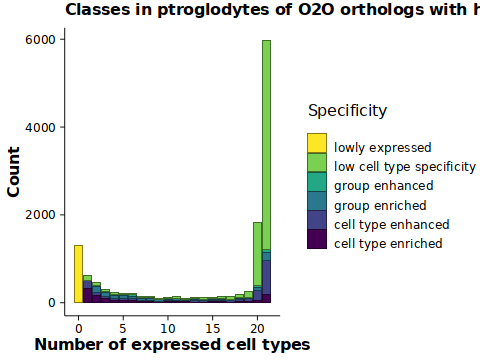

In [109]:
fig_bar

In [114]:
all_pairs <- data.frame(
  species_1 = c('cjacchus', 'cjacchus', 'cjacchus', 'cjacchus', 'mmulatta', 'mmulatta', 'mmulatta', 'ggorilla', 'ggorilla', 'ptroglodytes', 'ptroglodytes'),
  species_2 = c('mmulatta', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ptroglodytes', 'hsapiens', 'hsapiens', 'hsapiens')
)

# Iterate over rows and assign values to species_1 and species_2
for (i in 1:nrow(all_pairs)) {
    species_1 <- all_pairs[i, 'species_1']
    species_2 <- all_pairs[i, 'species_2']

    data <- read_csv(paste0("homology_mapped_o2o_", species_1, "_", species_2, "_1TPM.csv"))

    fig_bar_sp1 = data %>% group_by(get(paste0("spec_category_", species_1)), get(paste0("n_exp_", species_1))) %>% count() %>% 
ungroup() %>% 
rename("spec_category_sp1" = "get(paste0(\"spec_category_\", species_1))", 
       "n_exp_sp1" = "get(paste0(\"n_exp_\", species_1))"
      )  %>% 
ggplot(aes(x = n_exp_sp1, y = n, fill = factor(spec_category_sp1, levels = rev(order)))) +
geom_bar(stat = 'identity', position = 'stack', color = 'black', size = 0.1) +
common_0x + 
scale_fill_viridis_d(name = 'Specificity', direction = -1) + 
common_0x +
labs(title = paste0("Classes in ", species_1, " of O2O orthologs with ", species_2),
    x = 'Number of expressed cell types', 
    y = 'Count')


    ggsave(plot = fig_bar_sp1, filename = paste0("bar_classes_n_exp_o2o/", species_1, "_O2O_", species_2, "_", species_1, "_bar_classes_n_exp_1TPM.pdf"), height = 4, width = 5)

    
    ggsave(plot = fig_bar_sp1, filename = paste0("bar_classes_n_exp_o2o/", species_1, "_O2O_", species_2, "_", species_1, "_bar_classes_n_exp_1TPM.png"), height = 4, width = 5, dpi = 300)



    fig_bar_sp2 = data %>% group_by(get(paste0("spec_category_", species_2)), get(paste0("n_exp_", species_2))) %>% count() %>% 
ungroup() %>% 
rename("spec_category_sp2" = "get(paste0(\"spec_category_\", species_2))", 
       "n_exp_sp2" = "get(paste0(\"n_exp_\", species_2))"
      )  %>% 
ggplot(aes(x = n_exp_sp2, y = n, fill = factor(spec_category_sp2, levels = rev(order)))) +
geom_bar(stat = 'identity', position = 'stack', color = 'black', size = 0.1) +
common_0x + 
scale_fill_viridis_d(name = 'Specificity', direction = -1) + 
common_0x +
labs(title = paste0("Classes in ", species_2, " of O2O orthologs with ", species_1),
    x = 'Number of expressed cell types', 
    y = 'Count')


    ggsave(plot = fig_bar_sp2, filename = paste0("bar_classes_n_exp_o2o/", species_1, "_O2O_", species_2, "_", species_2, "_bar_classes_n_exp_1TPM.pdf"), height = 4, width = 5)

    ggsave(plot = fig_bar_sp2, filename = paste0("bar_classes_n_exp_o2o/", species_1, "_O2O_", species_2, "_", species_2, "_bar_classes_n_exp_1TPM.png"), height = 4, width = 5, dpi = 300)

    }


New names:
• `` -> `...1`
Rows: 12205 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): ensembl_gene_id, mmulatta_homolog_ensembl_gene, mmulatta_homolog_o...
dbl (33): ...1, Unnamed: 0_cjacchus, mean_exp_cjacchus, min_exp_cjacchus, ma...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
New names:
• `` -> `...1`
Rows: 11470 Columns: 59
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): ensembl_gene_id, ggorilla_homolog_ensembl_gene, ggorilla_homolog_o...
dbl (33): ...1, Unnamed: 0_cjacchus, mean_exp_cjacchus, min_exp_cjacchus, ma...

ℹ Use `spec()` to retrieve the full column specification f